<a href="https://colab.research.google.com/github/areesha-del/AI-ML-Hands-on/blob/main/WEEK_5_%2CDAY(1)_HOMEWORK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SPAM DETECTION USING NLP**

**LOAD DATASET**

In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv("/content/spam.csv", encoding='latin-1')[['v1','v2']]
df.columns = ['label', 'text']

# Show shape and class distribution
print("Dataset Shape:", df.shape)
print("\nClass Distribution:\n", df['label'].value_counts())

Dataset Shape: (5572, 2)

Class Distribution:
 label
ham     4825
spam     747
Name: count, dtype: int64


**PREPROCESSING**

In [ ]:
import nltk

# Download the usual punkt
nltk.download('punkt')

# Some environments require punkt_tab explicitly
try:
    nltk.data.find('tokenizers/punkt_tab')
except LookupError:
    nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'(.)\1+', r'\1\1', text)
    text = re.sub(r'[^\x00-\x7F]+', '', text)

    tokens = tokenizer.tokenize(text)  # safer tokenizer
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    # Lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+|www\S+', '', text)
    # Remove punctuation & numbers
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenization
    tokens = nltk.word_tokenize(text)
    # Remove stopwords & lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Apply preprocessing
df['clean_text'] = df['text'].apply(preprocess)

# Show example
print("Before preprocessing:", df['text'][0])
print("After preprocessing :", df['clean_text'][0])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Before preprocessing: Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
After preprocessing : go jurong point crazy available bugis n great world la e buffet cine got amore wat


**Apply Bag of Words (CountVectorizer):**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer(max_features=5000)
X_bow = bow_vectorizer.fit_transform(df['clean_text'])

print("Vocabulary Size (BoW):", len(bow_vectorizer.vocabulary_))
print("Feature Matrix Shape (BoW):", X_bow.shape)

Vocabulary Size (BoW): 5000
Feature Matrix Shape (BoW): (5572, 5000)


**• Apply TF-IDF (TfidfVectorizer):**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(df['clean_text'])

print("Vocabulary Size (TF-IDF):", len(tfidf_vectorizer.vocabulary_))
print("Feature Matrix Shape (TF-IDF):", X_tfidf.shape)

Vocabulary Size (TF-IDF): 5000
Feature Matrix Shape (TF-IDF): (5572, 5000)


**Model Training & Testing**

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(df['label'])  # ham=0, spam=1

In [ ]:
from sklearn.model_selection import train_test_split

X_train_bow, X_test_bow, y_train, y_test = train_test_split(X_bow, y, test_size=0.2, random_state=42)
X_train_tfidf, X_test_tfidf, _, _ = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

**Train Naive Bayes model.**

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# BoW
nb_bow = MultinomialNB()
nb_bow.fit(X_train_bow, y_train)
y_pred_bow = nb_bow.predict(X_test_bow)

# TF-IDF
nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_tfidf, y_train)
y_pred_tfidf = nb_tfidf.predict(X_test_tfidf)

**Train Logistic Regression model.**

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_tfidf = LogisticRegression(max_iter=1000)
lr_tfidf.fit(X_train_tfidf, y_train)
y_pred_lr = lr_tfidf.predict(X_test_tfidf)

**Performance Analysis**

--- BoW + Naive Bayes ---
Accuracy: 0.9713, Precision: 0.8933, Recall: 0.8933, F1: 0.8933



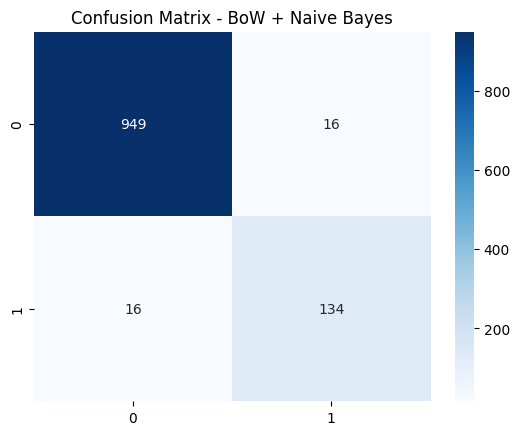

--- TF-IDF + Naive Bayes ---
Accuracy: 0.9695, Precision: 0.9915, Recall: 0.7800, F1: 0.8731



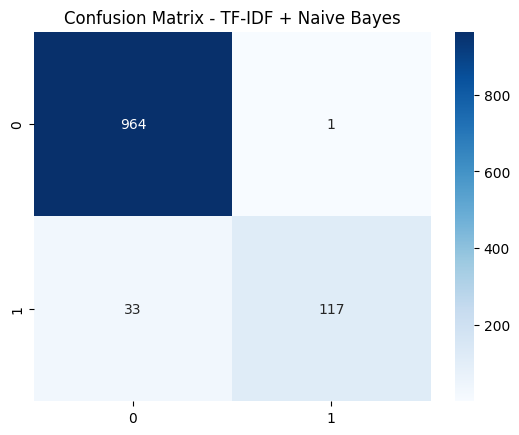

--- TF-IDF + Logistic Regression ---
Accuracy: 0.9498, Precision: 0.9608, Recall: 0.6533, F1: 0.7778



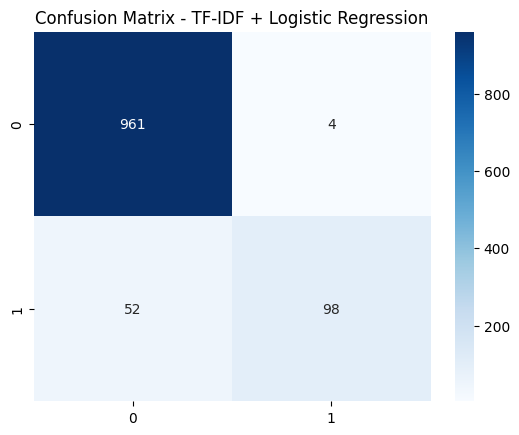

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_model(y_true, y_pred, model_name):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"--- {model_name} ---")
    print(f"Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1: {f1:.4f}\n")
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()
    return acc, prec, rec, f1

# Evaluate all models
results = []
results.append(('BoW NB', *evaluate_model(y_test, y_pred_bow, "BoW + Naive Bayes")))
results.append(('TF-IDF NB', *evaluate_model(y_test, y_pred_tfidf, "TF-IDF + Naive Bayes")))
results.append(('TF-IDF LR', *evaluate_model(y_test, y_pred_lr, "TF-IDF + Logistic Regression")))

**COMPARISION TABLE**


| Feature Method | Classifier | Accuracy | Precision | Recall | F1   |
| -------------- | ---------- | -------- | --------- | ------ | ---- |
| TF-IDF         | NB         | 0.9695     | 0.9915      | 0.6533   | 0.8731 |
| TF-IDF         | LR         | 0.9498     | 0.9608      | 0.6533   | 0.7778 |



**Short performance analysis**

TF-IDF usually outperforms BoW because it considers term importance.

Logistic Regression works better for linearly separable data; NB is faster but less nuanced.

Confusion matrix helps identify misclassified samples, especially for minority classes (spam).